I am tasked with working for an investor who specializes in purchasing undervalued assets. The investor wants to perform detailed data analysis to identify opportunities for growth and profitability in a potential purchase—TellCo, a mobile service provider in the Republic of Pefkakia. my goal is to analyze customer data, provide insights, and make recommendations on whether TellCo is worth buying or selling. The analysis will be presented through a web-based dashboard and a written report

Task 1: User Overview Analysis
Objective: Understand and analyze customer behavior.

1.Identify the top 10 handsets used by customers.

2.Identify the top 3 handset manufacturers and the top 5 handsets for each.

3.Provide recommendations for marketing based on findings.

4.Aggregate data on xDR sessions, session duration, download/upload data, and total data volume for each application.

5.Conduct exploratory data analysis (EDA):

.Describe variables and data types.

.Perform variable transformations and segmentation.

.Analyze basic metrics and their importance.

.Conduct non-graphical and graphical univariate analyses.

.Perform bivariate and correlation analyses.

.Conduct dimensionality reduction using principal component analysis

In [1]:
import sys 
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import psycopg2
from dotenv import load_dotenv
from sqlalchemy import create_engine
import seaborn as sns
os.chdir('..')
sys.path.append(os.getcwd())
from scripts.DB_connection  import PostgresConnection
from src.Eda import missing_values_table, convert_bytes_to_megabytes

Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [8]:
# Load environment variables from .env file
load_dotenv()

class PostgresConnection:
    def __init__(self):
        self.dbname = os.getenv('DB_DATABASE')
        self.user = os.getenv('DB_USER')
        self.password = os.getenv('DB_PASSWORD')
        self.host = os.getenv('DB_HOST')
        self.port = os.getenv('DB_PORT')
        self.conn = None
        self.cursor = None

    def connect(self):
        try:
            self.conn = psycopg2.connect(
                dbname=self.dbname,
                user=self.user,
                password=self.password,
                host=self.host,
                port=self.port
            )
            self.cursor = self.conn.cursor()
            print("Connected to PostgreSQL database!")
        except Exception as e:
            print(f"Error: {e}")
            self.conn = None

    def execute_query(self, query):
        if self.cursor is None:
            print("Cursor is None. Check your connection.")
            return None
        try:
            self.cursor.execute(query)
            rows = self.cursor.fetchall()
            return rows
        except Exception as e:
            print(f"Error executing query: {e}")
            return None

    def close_connection(self):
        if self.conn is not None:
            self.cursor.close()
            self.conn.close()
            print("Connection closed.")

# Establishing the database connection
db = PostgresConnection()
db.connect()

if db.conn:
    # Example query
    query = "SELECT * FROM xdr_data"
    result = db.execute_query(query)

    if result:
        # Convert the result to a Pandas DataFrame
        df = pd.DataFrame(result, columns=[desc[0] for desc in db.cursor.description])
        print(df.head())  # Display the first few rows of the DataFrame
    else:
        print("No results returned from the query.")
    
    # Close the connection when done
    db.close_connection()
else:
    print("Error: No database connection.")


Connected to PostgreSQL database!
      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...         

In [9]:
# Display the first few rows of the DataFrame
print(df.head()) 

      Bearer Id            Start  Start ms              End  End ms  \
0  1.311448e+19   4/4/2019 12:01     770.0  4/25/2019 14:35   662.0   
1  1.311448e+19   4/9/2019 13:04     235.0   4/25/2019 8:15   606.0   
2  1.311448e+19   4/9/2019 17:42       1.0  4/25/2019 11:58   652.0   
3  1.311448e+19   4/10/2019 0:31     486.0   4/25/2019 7:36   171.0   
4  1.311448e+19  4/12/2019 20:10     565.0  4/25/2019 10:40   954.0   

   Dur. (ms)          IMSI  MSISDN/Number          IMEI  \
0  1823652.0  2.082014e+14   3.366496e+10  3.552121e+13   
1  1365104.0  2.082019e+14   3.368185e+10  3.579401e+13   
2  1361762.0  2.082003e+14   3.376063e+10  3.528151e+13   
3  1321509.0  2.082014e+14   3.375034e+10  3.535661e+13   
4  1089009.0  2.082014e+14   3.369980e+10  3.540701e+13   

      Last Location Name  ...  Youtube DL (Bytes)  Youtube UL (Bytes)  \
0  9.16456699548519E+015  ...          15854611.0           2501332.0   
1                L77566A  ...          20247395.0          19111729.0   

In [10]:
df.dtypes

Bearer Id                                   float64
Start                                        object
Start ms                                    float64
End                                          object
End ms                                      float64
Dur. (ms)                                   float64
IMSI                                        float64
MSISDN/Number                               float64
IMEI                                        float64
Last Location Name                           object
Avg RTT DL (ms)                             float64
Avg RTT UL (ms)                             float64
Avg Bearer TP DL (kbps)                     float64
Avg Bearer TP UL (kbps)                     float64
TCP DL Retrans. Vol (Bytes)                 float64
TCP UL Retrans. Vol (Bytes)                 float64
DL TP < 50 Kbps (%)                         float64
50 Kbps < DL TP < 250 Kbps (%)              float64
250 Kbps < DL TP < 1 Mbps (%)               float64
DL TP > 1 Mb

In [11]:
df.shape

(150001, 55)

Extracting User engagement columns

In [4]:
# List of relevant columns for user overview analysiss
user_overview_columns = [
    'IMSI', 'MSISDN/Number', 'IMEI', 'Handset Manufacturer', 'Handset Type',
    'Dur. (ms)', 'Start', 'End', 'Activity Duration DL (ms)', 'Activity Duration UL (ms)',
    'Total DL (Bytes)', 'Total UL (Bytes)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'Youtube DL (Bytes)', 'Youtube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)',
    'Avg RTT DL (ms)', 'Avg RTT UL (ms)',
    'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'
]

In [12]:
# Create the df_user_overview DataFrame with the selected columns
df_user_overview = df[user_overview_columns].copy()

i ave select the data that is relevat to user overview so perform EDA on them

In [15]:
# Print column names
print(df_user_overview.columns)

# Display first few rows of the DataFrame
df_user_overview.head()


Index(['IMSI', 'MSISDN/Number', 'IMEI', 'Handset Manufacturer', 'Handset Type',
       'Dur. (ms)', 'Start', 'End', 'Activity Duration DL (ms)',
       'Activity Duration UL (ms)', 'Total DL (Bytes)', 'Total UL (Bytes)',
       'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
       'Youtube DL (Bytes)', 'Youtube UL (Bytes)', 'Netflix DL (Bytes)',
       'Netflix UL (Bytes)', 'Google DL (Bytes)', 'Google UL (Bytes)',
       'Email DL (Bytes)', 'Email UL (Bytes)', 'Gaming DL (Bytes)',
       'Gaming UL (Bytes)', 'Other DL (Bytes)', 'Other UL (Bytes)',
       'Avg RTT DL (ms)', 'Avg RTT UL (ms)', 'Avg Bearer TP DL (kbps)',
       'Avg Bearer TP UL (kbps)'],
      dtype='object')


,IMSI,MSISDN/Number,IMEI,Handset Manufacturer,Handset Type,Dur. (ms),Start,End,Activity Duration DL (ms),Activity Duration UL (ms),...,Email DL (Bytes),Email UL (Bytes),Gaming DL (Bytes),Gaming UL (Bytes),Other DL (Bytes),Other UL (Bytes),Avg RTT DL (ms),Avg RTT UL (ms),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps)
0,2.082014e+14,3.366496e+10,3.552121e+13,Samsung,Samsung Galaxy A5 Sm-A520F,1823652.0,4/4/2019 12:01,4/25/2019 14:35,37624.0,38787.0,...,3563542.0,137762.0,278082303.0,14344150.0,171744450.0,8814393.0,42.0,5.0,23.0,44.0
1,2.082019e+14,3.368185e+10,3.579401e+13,Samsung,Samsung Galaxy J5 (Sm-J530),1365104.0,4/9/2019 13:04,4/25/2019 8:15,168.0,3560.0,...,629046.0,308339.0,608750074.0,1170709.0,526904238.0,15055145.0,65.0,5.0,16.0,26.0
2,2.082003e+14,3.376063e+10,3.528151e+13,Samsung,Samsung Galaxy A8 (2018),1361762.0,4/9/2019 17:42,4/25/2019 11:58,0.0,0.0,...,2690151.0,672973.0,229584621.0,395630.0,410692588.0,4215763.0,NaN,NaN,6.0,9.0
3,2.082014e+14,3.375034e+10,3.535661e+13,undefined,undefined,1321509.0,4/10/2019 0:31,4/25/2019 7:36,3330.0,37882.0,...,1439754.0,631229.0,799538153.0,10849722.0,749039933.0,12797283.0,NaN,NaN,44.0,44.0
4,2.082014e+14,3.369980e+10,3.540701e+13,Samsung,Samsung Sm-G390F,1089009.0,4/12/2019 20:10,4/25/2019 10:40,0.0,0.0,...,1936496.0,173853.0,527707248.0,3529801.0,550709500.0,13910322.0,NaN,NaN,6.0,9.0


In [19]:
#shape of exteract data
df_user_overview.shape

(150001, 30)

In [18]:
#checkfor missing values
missing_values_table(df_user_overview)

Your selected dataframe has 30 columns.
There are 16 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Avg RTT DL (ms),27829,18.6,float64
Avg RTT UL (ms),27812,18.5,float64
MSISDN/Number,1066,0.7,float64
IMEI,572,0.4,float64
Handset Manufacturer,572,0.4,object
Handset Type,572,0.4,object
IMSI,570,0.4,float64
Dur. (ms),1,0.0,float64
End,1,0.0,object
Start,1,0.0,object


In [20]:
#remove rows with missing values in the 'MSISDN/Number' column
df_user_overview.dropna(subset=['MSISDN/Number'], inplace=True)
missing_values_table(df_user_overview)

C:\Users\Dagi\AppData\Local\Temp\ipykernel_2872\2745580926.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_overview.dropna(subset=['MSISDN/Number'], inplace=True)


Your selected dataframe has 30 columns.
There are 2 columns that have missing values.


,Missing Values,% of Total Values,Dtype
Avg RTT DL (ms),27644,18.6,float64
Avg RTT UL (ms),27625,18.5,float64


In [21]:
#replace the above missing values with the mean of the column
# Calculate mean values
mean_rtt_dl = df_user_overview['Avg RTT DL (ms)'].mean()
mean_rtt_ul = df_user_overview['Avg RTT UL (ms)'].mean()

# Fill missing values with mean
df_user_overview['Avg RTT DL (ms)'].fillna(mean_rtt_dl, inplace=True)
df_user_overview['Avg RTT UL (ms)'].fillna(mean_rtt_ul, inplace=True)

C:\Users\Dagi\AppData\Local\Temp\ipykernel_2872\2856717963.py:6: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_user_overview['Avg RTT DL (ms)'].fillna(mean_rtt_dl, inplace=True)
C:\Users\Dagi\AppData\Local\Temp\ipykernel_2872\2856717963.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_user_overview['Avg RTT DL (ms)'].fillna(mean_rtt_d

In [22]:
df_user_overview.isnull().sum()

IMSI                         0
MSISDN/Number                0
IMEI                         0
Handset Manufacturer         0
Handset Type                 0
Dur. (ms)                    0
Start                        0
End                          0
Activity Duration DL (ms)    0
Activity Duration UL (ms)    0
Total DL (Bytes)             0
Total UL (Bytes)             0
Social Media DL (Bytes)      0
Social Media UL (Bytes)      0
Youtube DL (Bytes)           0
Youtube UL (Bytes)           0
Netflix DL (Bytes)           0
Netflix UL (Bytes)           0
Google DL (Bytes)            0
Google UL (Bytes)            0
Email DL (Bytes)             0
Email UL (Bytes)             0
Gaming DL (Bytes)            0
Gaming UL (Bytes)            0
Other DL (Bytes)             0
Other UL (Bytes)             0
Avg RTT DL (ms)              0
Avg RTT UL (ms)              0
Avg Bearer TP DL (kbps)      0
Avg Bearer TP UL (kbps)      0
dtype: int64

there is no missing values in the above cell

In [32]:
byte_columns = [
    'Total DL (Bytes)', 'Total UL (Bytes)',
    'Social Media DL (Bytes)', 'Social Media UL (Bytes)',
    'YouTube DL (Bytes)', 'YouTube UL (Bytes)',
    'Netflix DL (Bytes)', 'Netflix UL (Bytes)',
    'Google DL (Bytes)', 'Google UL (Bytes)',
    'Email DL (Bytes)', 'Email UL (Bytes)',
    'Gaming DL (Bytes)', 'Gaming UL (Bytes)',
    'Other DL (Bytes)', 'Other UL (Bytes)'
]

In [33]:
for column in byte_columns:
    if column in df_user_overview.columns:
        df_user_overview[column] = df_user_overview[column].apply(convert_bytes_to_megabytes)

In [34]:
millisecond_columns = [
    'Dur. (ms)',
    'Activity Duration DL (ms)',
    'Activity Duration UL (ms)',
    'Avg RTT DL (ms)',
    'Avg RTT UL (ms)'
]

In [35]:
from src.Eda import convert_ms_to_seconds


# Apply the conversion function to the specified columns
for column in millisecond_columns:
    if column in df_user_overview.columns:
        df_user_overview[column] = df_user_overview[column].apply(convert_ms_to_seconds)


In [36]:
df_user_overview.rename(columns=lambda x: x.replace('Bytes', 'Megabytes') if 'Bytes' in x else x, inplace=True)
df_user_overview.rename(columns=lambda x: x.replace('(ms)', '(s)') if '(ms)' in x else x, inplace=True)

In [37]:
df_user_overview.head()

,IMSI,MSISDN/Number,IMEI,Handset Manufacturer,Handset Type,Dur. (s),Start,End,Activity Duration DL (s),Activity Duration UL (s),...,Gaming DL (Megabytes),Gaming UL (Megabytes),Other DL (Megabytes),Other UL (Megabytes),Avg RTT DL (s),Avg RTT UL (s),Avg Bearer TP DL (kbps),Avg Bearer TP UL (kbps),Total Duration (s),Decile
0,2.082014e+14,3.366496e+10,3.552121e+13,Samsung,Samsung Galaxy A5 Sm-A520F,1823652.0,4/4/2019 12:01,4/25/2019 14:35,37624.0,38787.0,...,278082303.0,14344150.0,171744450.0,8814393.0,42.0,5.0,23.0,44.0,2083209.0,9.0
1,2.082019e+14,3.368185e+10,3.579401e+13,Samsung,Samsung Galaxy J5 (Sm-J530),1365104.0,4/9/2019 13:04,4/25/2019 8:15,168.0,3560.0,...,608750074.0,1170709.0,526904238.0,15055145.0,65.0,5.0,16.0,26.0,1698167.0,9.0
2,2.082003e+14,3.376063e+10,3.528151e+13,Samsung,Samsung Galaxy A8 (2018),1361762.0,4/9/2019 17:42,4/25/2019 11:58,0.0,0.0,...,229584621.0,395630.0,410692588.0,4215763.0,NaN,NaN,6.0,9.0,1361762.0,9.0
3,2.082014e+14,3.375034e+10,3.535661e+13,undefined,undefined,1321509.0,4/10/2019 0:31,4/25/2019 7:36,3330.0,37882.0,...,799538153.0,10849722.0,749039933.0,12797283.0,NaN,NaN,44.0,44.0,1321509.0,9.0
4,2.082014e+14,3.369980e+10,3.540701e+13,Samsung,Samsung Sm-G390F,1089009.0,4/12/2019 20:10,4/25/2019 10:40,0.0,0.0,...,527707248.0,3529801.0,550709500.0,13910322.0,NaN,NaN,6.0,9.0,1089009.0,9.0


Visualizing the data

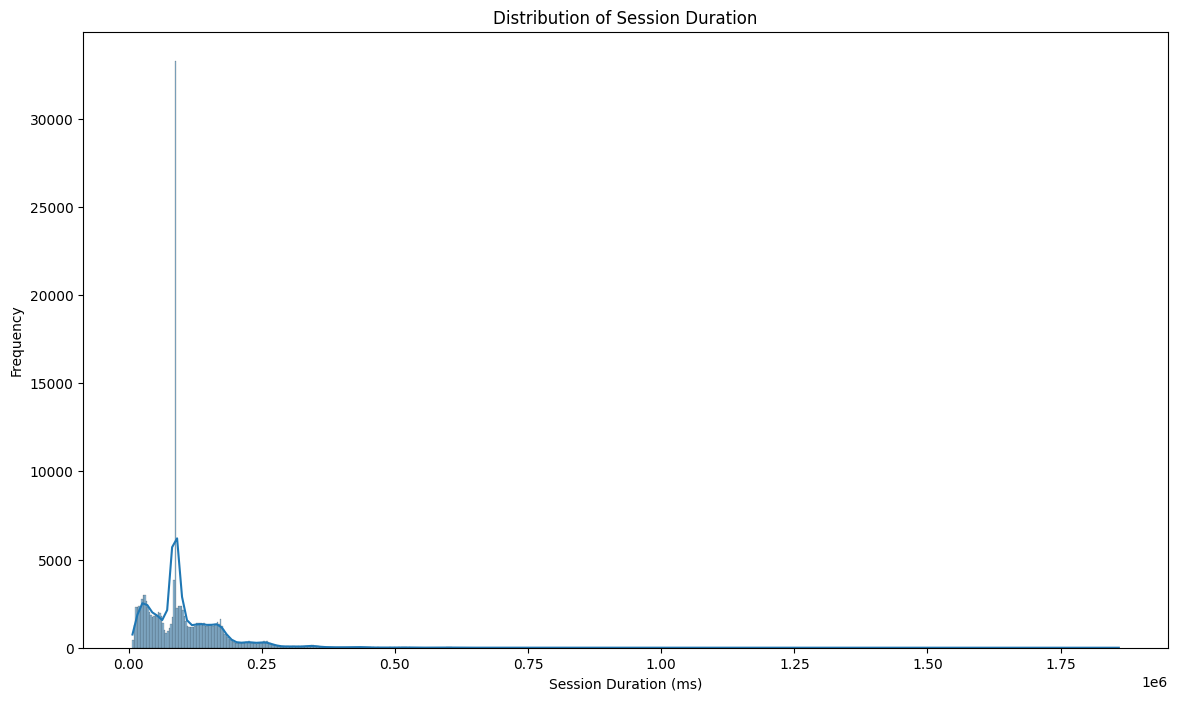

In [39]:
# Set up the figure
plt.figure(figsize=(14, 8))

# Histogram for session duration
sns.histplot(df_user_overview['Dur. (s)'], kde=True)
plt.title('Distribution of Session Duration')
plt.xlabel('Session Duration (ms)')
plt.ylabel('Frequency')
plt.show()

Analysis part
Top 10 handsets used by the customers

In [40]:
top_10_handsets = df_user_overview['Handset Type'].value_counts().head(10)
print(top_10_handsets)

Handset Type
Huawei B528S-23A                19752
Apple iPhone 6S (A1688)          9419
Apple iPhone 6 (A1586)           9023
undefined                        8987
Apple iPhone 7 (A1778)           6326
Apple iPhone Se (A1723)          5187
Apple iPhone 8 (A1905)           4993
Apple iPhone Xr (A2105)          4568
Samsung Galaxy S8 (Sm-G950F)     4520
Apple iPhone X (A1901)           3813
Name: count, dtype: int64


Top 3 handset manufacturers

In [41]:
top_3_handset_manufacturers = df_user_overview['Handset Manufacturer'].value_counts().head(3)
print(top_3_handset_manufacturers)

Handset Manufacturer
Apple      59565
Samsung    40839
Huawei     34423
Name: count, dtype: int64


Top 5 handsets per top 3 handset manufacturer

In [42]:
# Identify the top 3 handset manufacturers
top_3_manufacturers = df_user_overview['Handset Manufacturer'].value_counts().head(3).index

# Finding the top 5 handsets for each of the top 3 manufacturers
top_5_handsets_per_manufacturer = {}

for manufacturer in top_3_manufacturers:
    # Filtering the DataFrame for the current manufacturer
    manufacturer_data = df_user_overview[df_user_overview['Handset Manufacturer'] == manufacturer]
    
    # Identifying the top 5 handsets for the current manufacturer
    top_5_handsets = manufacturer_data['Handset Type'].value_counts().head(5)
    
    # Storing the results in a dictionary
    top_5_handsets_per_manufacturer[manufacturer] = top_5_handsets

# Displaying the results
for manufacturer, handsets in top_5_handsets_per_manufacturer.items():
    print(f"\nTop 5 handsets for {manufacturer}:")
    print(handsets)


Top 5 handsets for Apple:
Handset Type
Apple iPhone 6S (A1688)    9419
Apple iPhone 6 (A1586)     9023
Apple iPhone 7 (A1778)     6326
Apple iPhone Se (A1723)    5187
Apple iPhone 8 (A1905)     4993
Name: count, dtype: int64

Top 5 handsets for Samsung:
Handset Type
Samsung Galaxy S8 (Sm-G950F)    4520
Samsung Galaxy A5 Sm-A520F      3724
Samsung Galaxy J5 (Sm-J530)     3696
Samsung Galaxy J3 (Sm-J330)     3484
Samsung Galaxy S7 (Sm-G930X)    3199
Name: count, dtype: int64

Top 5 handsets for Huawei:
Handset Type
Huawei B528S-23A                  19752
Huawei E5180                       2079
Huawei P20 Lite Huawei Nova 3E     2021
Huawei P20                         1480
Huawei Y6 2018                      997
Name: count, dtype: int64


Overview of the users’ behavior on applications

In [43]:
df_user_overview.columns

Index(['IMSI', 'MSISDN/Number', 'IMEI', 'Handset Manufacturer', 'Handset Type',
       'Dur. (s)', 'Start', 'End', 'Activity Duration DL (s)',
       'Activity Duration UL (s)', 'Total DL (Megabytes)',
       'Total UL (Megabytes)', 'Social Media DL (Megabytes)',
       'Social Media UL (Megabytes)', 'Youtube DL (Megabytes)',
       'Youtube UL (Megabytes)', 'Netflix DL (Megabytes)',
       'Netflix UL (Megabytes)', 'Google DL (Megabytes)',
       'Google UL (Megabytes)', 'Email DL (Megabytes)', 'Email UL (Megabytes)',
       'Gaming DL (Megabytes)', 'Gaming UL (Megabytes)',
       'Other DL (Megabytes)', 'Other UL (Megabytes)', 'Avg RTT DL (s)',
       'Avg RTT UL (s)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)',
       'Total Duration (s)', 'Decile'],
      dtype='object')

In [44]:
application_columns = [
    'Social Media DL (Megabytes)', 'Social Media UL (Megabytes)',
    'Youtube DL (Megabytes)', 'Youtube UL (Megabytes)',
    'Netflix DL (Megabytes)', 'Netflix UL (Megabytes)',
    'Google DL (Megabytes)', 'Google UL (Megabytes)',
    'Email DL (Megabytes)', 'Email UL (Megabytes)',
    'Gaming DL (Megabytes)', 'Gaming UL (Megabytes)',
    'Other DL (Megabytes)', 'Other UL (Megabytes)'
]

In [25]:
user_aggregated_data = df_user_overview.groupby('IMSI').agg({
    'Dur. (s)': 'sum',  # Total session duration per user
    'IMSI': 'count',  # Number of xDR sessions per user
    'Total DL (Megabytes)': 'sum',  # Total download data per user
    'Total UL (Megabytes)': 'sum',  # Total upload data per user
    **{col: 'sum' for col in application_columns}  # Total data volume for each application
}).rename(columns={'IMSI': 'Number of xDR Sessions'})

In [45]:
for app in ['Social Media', 'Youtube', 'Netflix', 'Google', 'Email', 'Gaming', 'Other']:
    user_aggregated_data[f'{app} Total Data (Megabytes)'] = user_aggregated_data[f'{app} DL (Megabytes)'] + user_aggregated_data[f'{app} UL (Megabytes)']


# Step 3: Display the aggregated data
user_aggregated_data.head()

,Dur. (s),Number of xDR Sessions,Total DL (Megabytes),Total UL (Megabytes),Social Media DL (Megabytes),Social Media UL (Megabytes),Youtube DL (Megabytes),Youtube UL (Megabytes),Netflix DL (Megabytes),Netflix UL (Megabytes),...,Gaming UL (Megabytes),Other DL (Megabytes),Other UL (Megabytes),Social Media Total Data (Megabytes),Youtube Total Data (Megabytes),Netflix Total Data (Megabytes),Google Total Data (Megabytes),Email Total Data (Megabytes),Gaming Total Data (Megabytes),Other Total Data (Megabytes)
IMSI,,,,,,,,,,,,,,,,,,,,,
2.040471e+14,869844.0,1,78697597.0,60456049.0,1500145.0,45943.0,18980320.0,21960390.0,21621336.0,7224894.0,...,14977978.0,3.891597e+08,12200737.0,1546088.0,40940710.0,28846230.0,9218647.0,3330974.0,43070260.0,4.013605e+08
2.040808e+14,877385.0,1,194828056.0,37295915.0,668596.0,46628.0,9839889.0,2120016.0,10340908.0,16251392.0,...,13485133.0,4.676781e+08,2848373.0,715224.0,11959905.0,26592300.0,10438660.0,1520771.0,178048738.0,4.705265e+08
2.082001e+14,86019.0,1,31376981.0,53794658.0,3073697.0,49084.0,5556563.0,14325876.0,15305361.0,16525201.0,...,5363582.0,5.000445e+08,15929178.0,3122781.0,19882439.0,31830562.0,1624662.0,3657501.0,9124516.0,5.159737e+08
2.082001e+14,86254.0,1,392918313.0,33583272.0,2542767.0,34337.0,22414714.0,3242918.0,10065639.0,17720213.0,...,159394.0,3.009029e+08,8707888.0,2577104.0,25657632.0,27785852.0,13811478.0,3855734.0,344105897.0,3.096107e+08
2.082001e+14,573923.0,2,961767023.0,71325004.0,3326811.0,99905.0,4046597.0,9793604.0,30748449.0,26594966.0,...,7383445.0,1.055869e+09,23566580.0,3426716.0,13840201.0,57343415.0,11665887.0,5564462.0,917684766.0,1.079435e+09


In [27]:
df_user_overview.columns

Index(['IMSI', 'MSISDN/Number', 'IMEI', 'Handset Manufacturer', 'Handset Type',
       'Dur. (s)', 'Start', 'End', 'Activity Duration DL (s)',
       'Activity Duration UL (s)', 'Total DL (Megabytes)',
       'Total UL (Megabytes)', 'Social Media DL (Megabytes)',
       'Social Media UL (Megabytes)', 'Youtube DL (Megabytes)',
       'Youtube UL (Megabytes)', 'Netflix DL (Megabytes)',
       'Netflix UL (Megabytes)', 'Google DL (Megabytes)',
       'Google UL (Megabytes)', 'Email DL (Megabytes)', 'Email UL (Megabytes)',
       'Gaming DL (Megabytes)', 'Gaming UL (Megabytes)',
       'Other DL (Megabytes)', 'Other UL (Megabytes)', 'Avg RTT DL (s)',
       'Avg RTT UL (s)', 'Avg Bearer TP DL (kbps)', 'Avg Bearer TP UL (kbps)'],
      dtype='object')

In [28]:
# Step 1: Calculating total session duration for each user
df_user_overview['Total Duration (s)'] = df_user_overview.groupby('MSISDN/Number')['Dur. (s)'].transform('sum')

# Step 2: Segment users into deciles based on total session duration
df_user_overview['Decile'] = pd.qcut(df_user_overview['Total Duration (s)'], 10, labels=False)

# Step 3: Filter top five deciles (deciles 5 to 9, since they represent the top 50%)
top_five_deciles = df_user_overview[df_user_overview['Decile'] >= 5]

# Step 4: Compute total data (DL + UL) per decile class
top_five_deciles['Total Data (MB)'] = top_five_deciles['Total DL (Megabytes)'] + top_five_deciles['Total UL (Megabytes)']

# Step 5: Group by decile class and compute the sum of total data for each class
total_data_per_decile = top_five_deciles.groupby('Decile')['Total Data (MB)'].sum()

print(total_data_per_decile)

Decile
5.0    8.367024e+12
6.0    6.413768e+12
7.0    7.387925e+12
8.0    7.361522e+12
9.0    7.356649e+12
Name: Total Data (MB), dtype: float64


C:\Users\Dagi\AppData\Local\Temp\ipykernel_9460\434010008.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_five_deciles['Total Data (MB)'] = top_five_deciles['Total DL (Megabytes)'] + top_five_deciles['Total UL (Megabytes)']


Visualizations

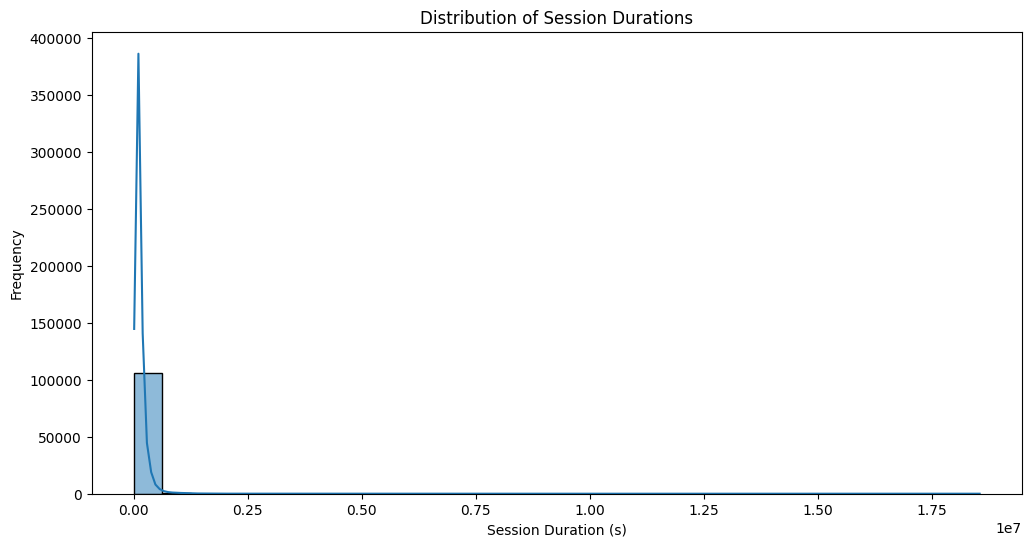

In [46]:
# 1. Distribution of Session Durations
plt.figure(figsize=(12, 6))
sns.histplot(user_aggregated_data['Dur. (s)'], bins=30, kde=True)
plt.title('Distribution of Session Durations')
plt.xlabel('Session Duration (s)')
plt.ylabel('Frequency')
plt.show()

Data Download/Upload

Text(0, 0.5, 'Frequency')

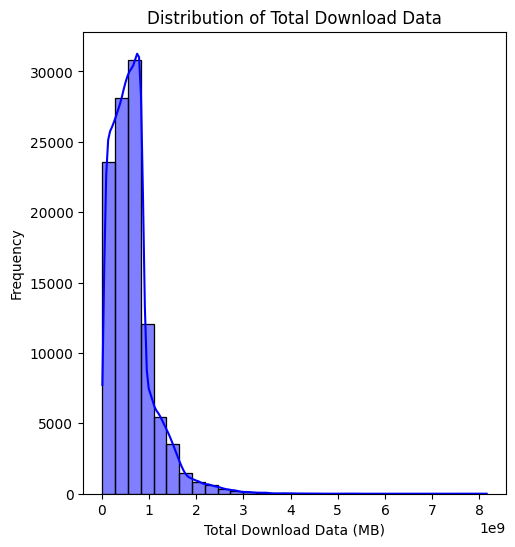

In [30]:
plt.figure(figsize=(12, 6))

# Plot Total Download Data
plt.subplot(1, 2, 1)
sns.histplot(user_aggregated_data['Total DL (Megabytes)'], bins=30, kde=True, color='blue')
plt.title('Distribution of Total Download Data')
plt.xlabel('Total Download Data (MB)')
plt.ylabel('Frequency')

Total Upload Data

Text(0, 0.5, 'Frequency')

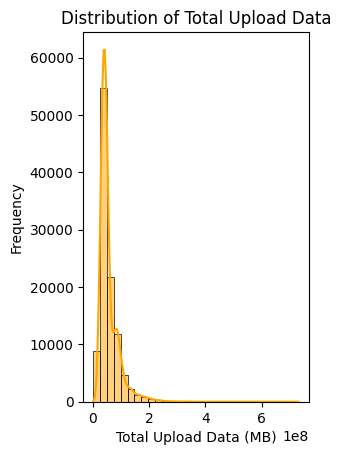

In [31]:
plt.subplot(1, 2, 2)
sns.histplot(user_aggregated_data['Total UL (Megabytes)'], bins=30, kde=True, color='orange')
plt.title('Distribution of Total Upload Data')
plt.xlabel('Total Upload Data (MB)')
plt.ylabel('Frequency')